# **Group 3** 
- Asmaa Alzahrani
- Sarah Alzahrani
- Shrouq Alharbi
- Rawan  Alsherhri 
- Khalid Alsuhaimi  
-Amani Almutairi



# **Predicting House Prices with Machine Learning**



- Predicting a sale price for a house based on the geographical variables (region location and distance from CBD).
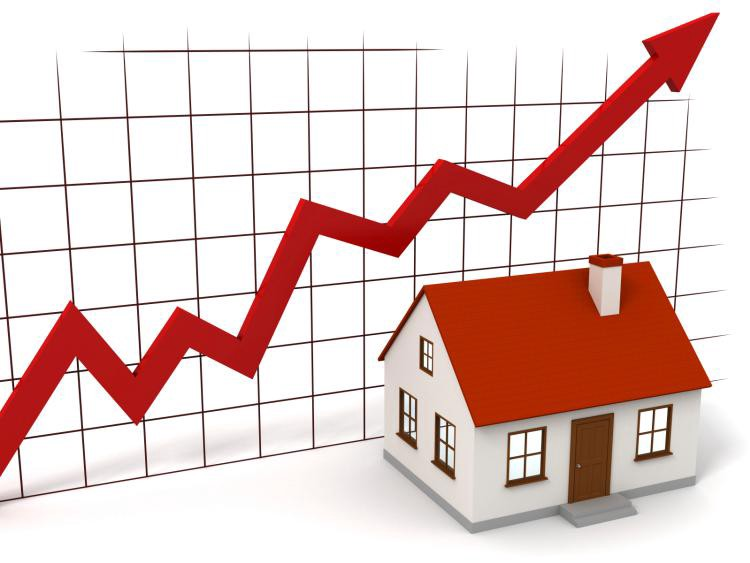

# Importing required packages


In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from scipy.stats import spearmanr
import seaborn as sns


import warnings  
warnings.filterwarnings('ignore')


# Load data


In [ ]:
#load datset
df=pd.read_csv('melb_data.csv')
print(df.shape)

FileNotFoundError: ignored



#Exploratory Data Analysis:

# - Data cleaning

In [ ]:
df.head()

In [ ]:
#looking at the features in the dataset.
df.info()

We can see some features are numeric while others are text. There are also missing values in the dataset.

In [ ]:
df.duplicated().sum()

In [ ]:
# Find columns with missing values and their percent missing
df.isnull().sum()                                                     
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val


Missing values are there in data so we need to fill them.

Firstly, we shall look at the relationship of the features which has missing values with the Price of house.

For Feature Car :



In [ ]:
sns.scatterplot(x = df["Car"],y = df["Price"])

In [ ]:
df["Car"].value_counts()

For BuildingArea

In [ ]:
sns.scatterplot(x = df["BuildingArea"],y = df["Price"]);


In [ ]:
df["BuildingArea"].value_counts()


For YearBuilt



In [ ]:
sns.scatterplot(x = df["YearBuilt"],y = df["Price"]);


In [ ]:
df["YearBuilt"].value_counts()


In [ ]:
sns.scatterplot(x = df["CouncilArea"],y = df["Price"]);


In [ ]:
df["CouncilArea"].value_counts()


By seeing the graphs we can fill the missing values with forward values or backward values as they are in either increasing order or decreasing order continuously

In [ ]:
df = df.fillna(method='ffill').fillna(method='bfill')


In [ ]:
#check null record
df.isnull().sum()

In [ ]:
#looking at the features in the dataset after cleaning.

df.info()

In [ ]:
# Check the dimension of the dataset after cleaning our data.
df.shape

The dataset is cleaned. It now has 13580 observations and 21 features.



In [ ]:
df.columns

In [ ]:
df.describe()

Let's now forward with data visualization using a Heatmap

# Data Visulaization 







Feature Selection :


* Correlation between Variables

We wil use heatmap to view the corelation between variables.

**Heatmap:**

Heatmaps are very useful to find relations between two variables in a dataset. Heatmap can be easily produced using the ‘heatmap’ function provided by the seaborn package in python.







In [ ]:
plt.figure(figsize=(15,10))

sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

In [ ]:
df[df.columns[:]].corr()['Price'][:]


*  A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
*A value closer to 1 implies stronger positive correlation
*A value closer to -1 implies stronger negative correlation.




In [ ]:
# drop columns with less correlation  and we don't need it
df = df.drop(['YearBuilt', 'Propertycount', 'Lattitude' , 'Longtitude' , 'Distance' ], axis=1)

So all the column data remains the same except the (YearBuilt, Propertycount, Lattitude, Longtitude, Distance ) columns are dropped. 

In [ ]:
# show the data type of columns 
df.dtypes

# Building a Model

* Applying machine learning algorithm



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [ ]:
# Choosing the target variable

y = df["Price"]
del df["Price"]

In [ ]:
#Performing one hot encoding for categorical features.


df["Suburb"] = pd.get_dummies(df["Suburb"])
df["Address"] = pd.get_dummies(df["Address"])
df["Method"] = pd.get_dummies(df["Method"])
df["SellerG"] = pd.get_dummies(df["SellerG"])
df["Regionname"] = pd.get_dummies(df["Regionname"])
df["CouncilArea"] = pd.get_dummies(df["CouncilArea"])
df["Type"] = pd.get_dummies(df["Type"])

In [ ]:
# Chossing features for predicting target variable

df_temp = df.select_dtypes(include=["int64","float64"]) 
X = df_temp

Train-Test Split dataset:

Before we can start modeling the data, we need to split the dataset into training and test sets. We will train the models with the training set and cross-validate with the test set. Recall we have lots of features in the dataset that are text. Most machine learning models require numerical input features. Since the process of converting text features to a numeric representation an involved task, we will only use the numeric features in our price prediction (for simplicity sake).

In [ ]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Random Forest Regression Model


In [ ]:
# create the model 
rf_model =  RandomForestRegressor(max_depth=13, random_state=0)


In [ ]:
# fit the training Data 
rf_model.fit(X_train,y_train)

In [ ]:
# Predicting the data using the model
rf_pred = rf_model.predict(X_test)
rf_pred

In [ ]:
# calculate the accuracy score 
rf_score= rf_model.score(X_test,y_test)

## Multiple Linear Regression:

In [ ]:
# Craete the model
mlr_model = LinearRegression()

In [ ]:
#fit the training Data 
mlr_model.fit(X_train,y_train)

In [ ]:
# Predicting the data using the model
mlr_pred = mlr_model.predict(X_test)

In [ ]:
# calculate the accuracy score 
mlr_score= mlr_model.score(X_test,y_test)

# Evaluating the Models 


In [ ]:
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Random forest Regression'],
                            'Score':[mlr_score,rf_score]
                           })


In [ ]:
models_score.sort_values(by='Score',ascending=False)

# Done !